In [3]:
#Tajour Cohen-Henry
#PythonPortfolioProject

#import seaborn
import seaborn as sns
#declaring the dataset mpg as mpg to point to it in the code
mpg = sns.load_dataset('mpg')
#list the first five entries for reference
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


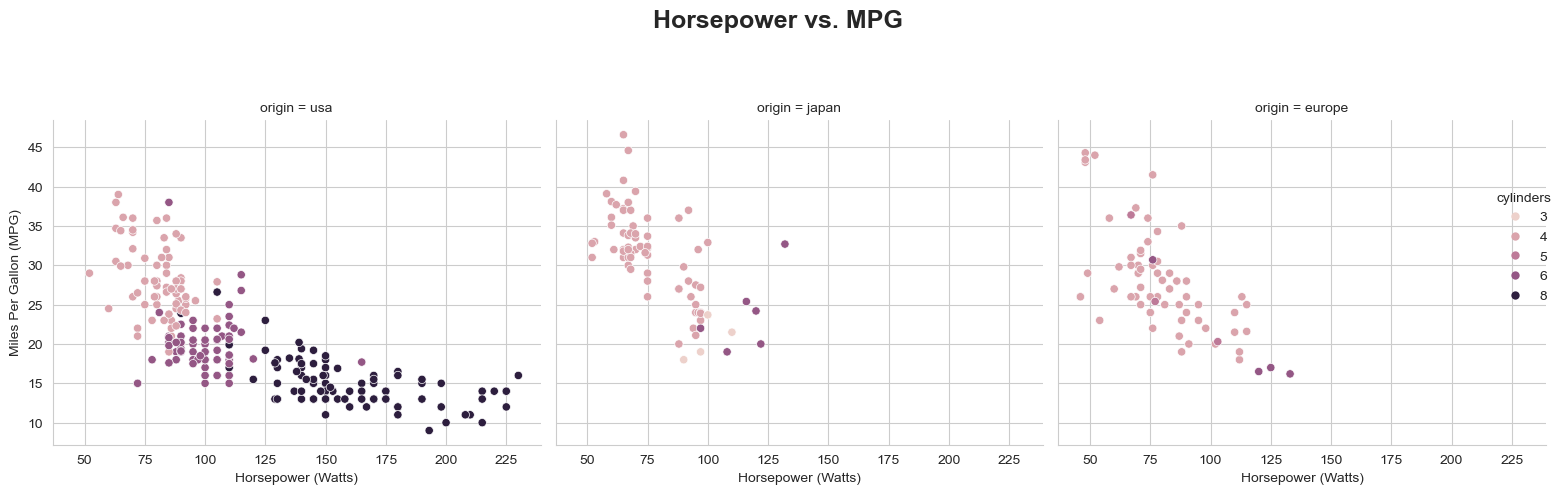

In [58]:
#1. Create a visual showing the relationship between horsepower and fuel economy.
"""
The relationship between horsepower and fuel economy is shown as a somewhat linar downward line. As horsepower increases, the fuel economy
decreases showing that the power behind the engine in vehicles doesnt correlate to being efficent. Also as you can see, as the number
of cylinders in the engine increases, it also relates to the horsepower of the vehicle as well. And that is because the more cyclinders, the more
work that is done to achieve the power needed, a.k.a horsepower. Also I grouped the results by origin (usa, japan, europe) to show the difference
between regions. As shown, usa has way more 6 cyclinder cars and the only region with 8 cyclinder cars. It also has the only vehicles over 125
horsepower. Japan is shown to have a lot more fuel economy cars as their vehicles have higher mpg numbers. While Europe has some of the lowest
horsepower numbers for their cars. 
"""
ax = sns.relplot(
    data = mpg,
    x = 'horsepower', y = 'mpg', hue = 'cylinders', col = 'origin'
) 
ax.fig.suptitle('Horsepower vs. MPG', fontsize=18, fontweight='bold')
ax.fig.tight_layout(rect=[0, 0, 1, 0.9])
ax.set(xlabel='Horsepower (Watts)', ylabel='Miles Per Gallon (MPG)')

sns.set_style("whitegrid")

[Text(0.5, 25.52222222222222, 'Region'),
 Text(49.222222222222214, 0.5, 'Miles Per Gallon (MPG)')]

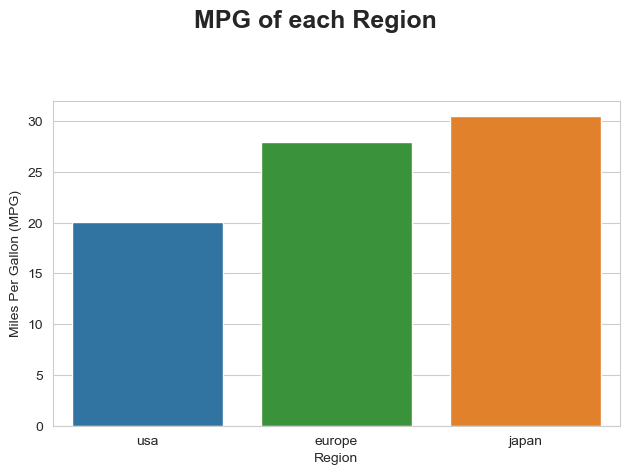

In [60]:
#2. Create a table summarizing fuel economy by country of origin. 
"""
The bar chart below shows mean amounts of each region's fuel economy. As shown below, Japan has the highest fuel economy (which was explained why
in the last question), while the usa has the lowest. Its like this because the usa has more vehicles that generate more power but as a cost they use
way more energy than what is put in, while vehicles in Japan have less power put out but conserve more energy that was put in. And Europe not having 
high horse power cars while not having the highest efficiency like Japan cars as well. 
"""
ax = sns.barplot(
    data = mpg, x = 'origin', y = 'mpg', hue = 'origin', errorbar = None, order = mpg.sort_values('mpg').origin
) 

ax.figure.suptitle('MPG of each Region', fontsize=18, fontweight='bold')
ax.figure.tight_layout(rect=[0, 0, 1, 0.9])
ax.set(xlabel='Region', ylabel='Miles Per Gallon (MPG)')

[Text(0.5, 25.52222222222222, 'Model Year'),
 Text(49.222222222222214, 0.5, 'Miles Per Gallon (MPG)')]

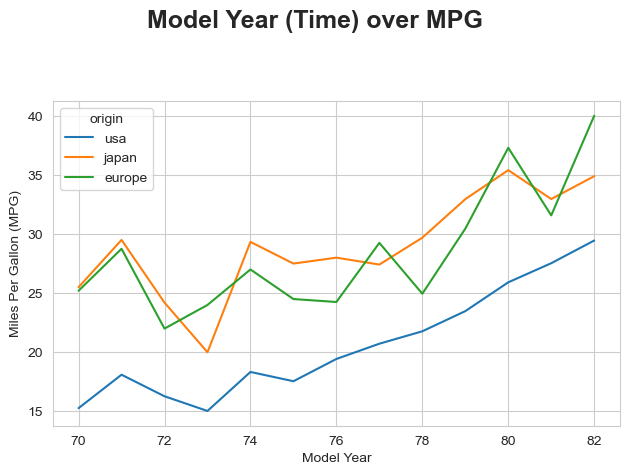

In [62]:
#3. Create a visual showing how fuel economy has changed over time. 
"""
This line graph shows the relation between model year for vehicles (which is used for the time factor) and fuel economy. Just from the first look,
overtime the fuel economy has gotten better over all as the mpg has gone up relative to the time going up. There are some dips at certain points, but
the only region that has more of a straight climb is the USA while Europe has more erratic dips while also increasing overall. But Japan has the largest
gap between model years 71 and 73 with a 10 mpg drop. And Europe has the largest climb vertically between model years 78 and 80 with a 15 mpg increase.
The USA region has a steady climb between model years 75 and 82 constantly increasing in a steady line. Fuel economy efficienty has been a constant for
the USA region.
"""
ax = sns.lineplot(
    data = mpg, x = 'model_year', y = 'mpg', errorbar = None, hue = 'origin'
) 
ax.figure.suptitle('Model Year (Time) over MPG', fontsize=18, fontweight='bold')
ax.figure.tight_layout(rect=[0, 0, 1, 0.9])
ax.set(xlabel='Model Year', ylabel='Miles Per Gallon (MPG)')

[Text(0.5, 25.52222222222222, 'Miles Per Gallon (MPG)'),
 Text(49.222222222222214, 0.5, 'MPG Count')]

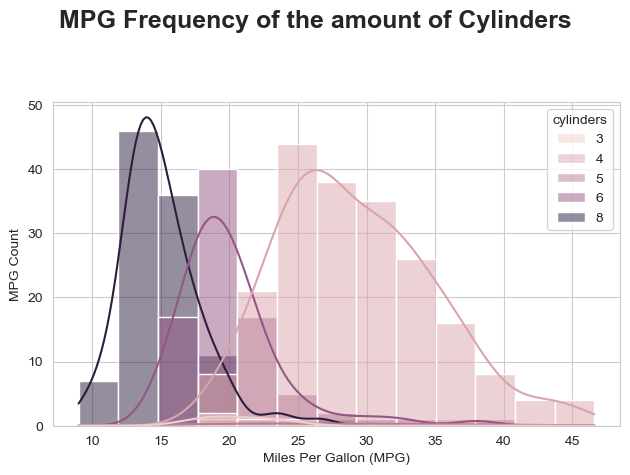

In [64]:
#4. A.Create two other visuals or tables related to fuel economy.  
"""
In this chart, I wanted to convey the relationship between the fuel economy amounts and the frequency (count) of each amount. Which is sectioned by
cylinder amount. So as shown, the highest count of vehicles are shown to have a mpg (fuel economy) of 12-15 while the lowest count is at a mpg of 45.
This just shows that a lot more vehicles were not built to be efficient (at first) and prioritized generating more power in the engines. And in addition
to that, its also reflected by the cylinder count as the higher the cylinder count is, the less amount of mpg there is. And that is clearly displayed right on
the chart. 
"""
ax = sns.histplot(
    data = mpg, x = 'mpg', hue = 'cylinders', stat = 'count', kde = True
)
ax.figure.suptitle('MPG Frequency of the amount of Cylinders', fontsize=18, fontweight='bold')
ax.figure.tight_layout(rect=[0, 0, 1, 0.9])
ax.set(xlabel='Miles Per Gallon (MPG)', ylabel='MPG Count')

[Text(0.5, 25.52222222222222, 'Weight (Pounds)'),
 Text(49.222222222222214, 0.5, 'Miles Per Gallon (MPG)')]

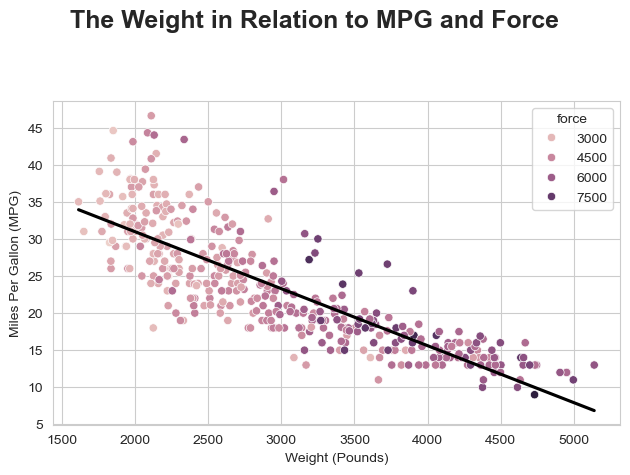

In [66]:
#4. B.Create two other visuals or tables related to fuel economy.
"""
This chart shows the relationship between fuel economy (mpg), weight, and force. To find the force, I just found the mass of each entry by calcuating the
weight divided by the acceleration due to gravity on earth (which is 9.8 m/s2 or 9.81), and then multiplying the mass with the acceleration of each
entry to get the force value of each one. The idea behind this was to demonstrate how heavier vehicles will generate more force while having a lower mpg 
since they are infact heavier. As shown in the chart, the most amount of force relates to the highest weights but middling weight values tend to have
higher force values as well. But as shown with the black trend line, overall as weight increases the mpg lowers which tracks to what I explained before.
"""
mpg.eval("mass = weight / 9.81", inplace=True)
mpg.eval("force = mass * acceleration", inplace=True)
ax = sns.scatterplot(
    data = mpg, x = 'weight', y = 'mpg', hue = 'force'
)
sns.regplot(
    data = mpg, x = 'weight', y = 'mpg', scatter = False, color = 'black', ci = None
)
ax.figure.suptitle('The Weight in Relation to MPG and Force', fontsize=18, fontweight='bold')
ax.figure.tight_layout(rect=[0, 0, 1, 0.9])
ax.set(xlabel='Weight (Pounds)', ylabel='Miles Per Gallon (MPG)')
